In [1]:
import cdsapi
import matplotlib.pyplot as plt
from pathlib import Path
import xarray as xr

In [2]:
c = cdsapi.Client()

Note that users must agree to the terms of service for each dataset being used before it can be exported.

In [3]:
def download_test_dataset(cdsapi_client):
    pressure_datapath = Path('../data/era5_test.grib')
    
    if not pressure_datapath.exists():
        cdsapi_client.retrieve('reanalysis-era5-pressure-levels', {
           "variable": "temperature",
           "pressure_level": "1000",
           "product_type": "reanalysis",
           "date": "2017-12-01/2017-12-31",
           "time": "12:00",
           "format": "grib"
           }, pressure_datapath)
    else:
        print('Dataset already downloaded!')
    
    return pressure_datapath

In [5]:
pressure_datapath = download_test_dataset(c)

Dataset already downloaded!


The datasets are downloaded as [GRIB](https://en.wikipedia.org/wiki/GRIB) files, but ECMWF has a convenient python package which makes it easy to read them into xarray.

In [6]:
ds = xr.open_dataset(pressure_datapath, engine='cfgrib')

2019-05-06 13:17:30,480 INFO ecCodes library found using name 'eccodes'.


And its easy to plot these! woo

In [18]:
ds2d = ds.isel(time=0)

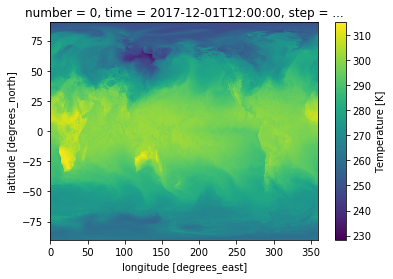

In [21]:
ds2d.t.plot()